In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
# sns.set()

# 그래프 기본 설정
from matplotlib.colors import Normalize
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('전처리/주택소유율에따른_경제안정성과고용률.csv')
df2 = pd.read_csv('전처리/지가지수_전처리.csv')

- 지가지수 데이터의 시도를 df1에 맞춘다.

In [3]:
sido_dict = {i : v for i, v in enumerate(df1['시도'].value_counts().index)}

In [4]:
for idx, val in enumerate(df2['시도'].value_counts().index) :
    sido_dict[val] = sido_dict.pop(idx)

In [5]:
df2['시도'] = df2['시도'].map(sido_dict)

- 지가지수 데이터의 연도를 df1에 맞춘다.

In [6]:
print(list(df1['연도'].value_counts().index))

[2006, 2008, 2010, 2012, 2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [7]:
df2_r = df2.loc[df2['연도'].isin(list(df1['연도'].value_counts().index))].reset_index(drop = True)

- 세종특별자치시의 결측치 부분을 0으로 대체한다.

In [8]:
df2_r.fillna(0, inplace = True)

In [9]:
merged_df = pd.merge(df1, df2_r, on=['시도', '연도'], how='inner')

In [10]:
merged_df.pop('GRDP')

0      1349602329
1      1465186371
2      1581956002
3      1677574227
4      1790169111
          ...    
229      22951902
230      21668785
231      22346390
232      23364427
233      24073959
Name: GRDP, Length: 234, dtype: int64

In [11]:
merged_df.dtypes

연도            int64
시도           object
자가점유가구비율    float64
고용률         float64
GRDP_백만     float64
지가지수        float64
dtype: object

In [24]:
merged_df['시도'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [23]:
merged_df[merged_df['시도'] != '세종']
['GRDP_백만'].min(

,연도,시도,자가점유가구비율,고용률,GRDP_백만,지가지수
0,2006,전국,55.60,60.0,1349.602329,67.671
1,2008,전국,56.40,59.8,1465.186371,70.076
2,2010,전국,54.30,58.9,1581.956002,71.487
3,2012,전국,53.80,59.6,1677.574227,73.012
4,2014,전국,53.60,60.5,1790.169111,75.290
...,...,...,...,...,...,...
229,2019,제주특별자치도,58.10,68.4,22.951902,98.673
230,2020,제주특별자치도,58.60,67.1,21.668785,96.766
231,2021,제주특별자치도,56.60,67.4,22.346390,98.554
232,2022,제주특별자치도,56.84,69.9,23.364427,100.414


In [21]:
merged_df['GRDP_백만'].min()

np.float64(2246.567225)

In [22]:
merged_df

,연도,시도,자가점유가구비율,고용률,GRDP_백만,지가지수
0,2006,전국,55.60,60.0,1349.602329,67.671
1,2008,전국,56.40,59.8,1465.186371,70.076
2,2010,전국,54.30,58.9,1581.956002,71.487
3,2012,전국,53.80,59.6,1677.574227,73.012
4,2014,전국,53.60,60.5,1790.169111,75.290
...,...,...,...,...,...,...
229,2019,제주특별자치도,58.10,68.4,22.951902,98.673
230,2020,제주특별자치도,58.60,67.1,21.668785,96.766
231,2021,제주특별자치도,56.60,67.4,22.346390,98.554
232,2022,제주특별자치도,56.84,69.9,23.364427,100.414


In [12]:
merged_df.iloc[:, 2:].corr()

,자가점유가구비율,고용률,GRDP_백만,지가지수
자가점유가구비율,1.000000,0.798492,-0.087031,0.614199
고용률,0.798492,1.000000,0.070540,0.646798
GRDP_백만,-0.087031,0.070540,1.000000,0.038861
지가지수,0.614199,0.646798,0.038861,1.000000


In [27]:
df_plot['GRDP_백만'].max()

np.float64(134.256079)

In [26]:
# 1. 서울, 경기도, 전국 제외
excl = ['서울특별시', '경기도', '전국']
df_plot = merged_df[~merged_df['시도'].isin(excl)].copy()

# 2. 연도형 정렬을 위해 int 변환 (혹시라도 object형일 경우)
df_plot['연도'] = df_plot['연도'].astype(int)

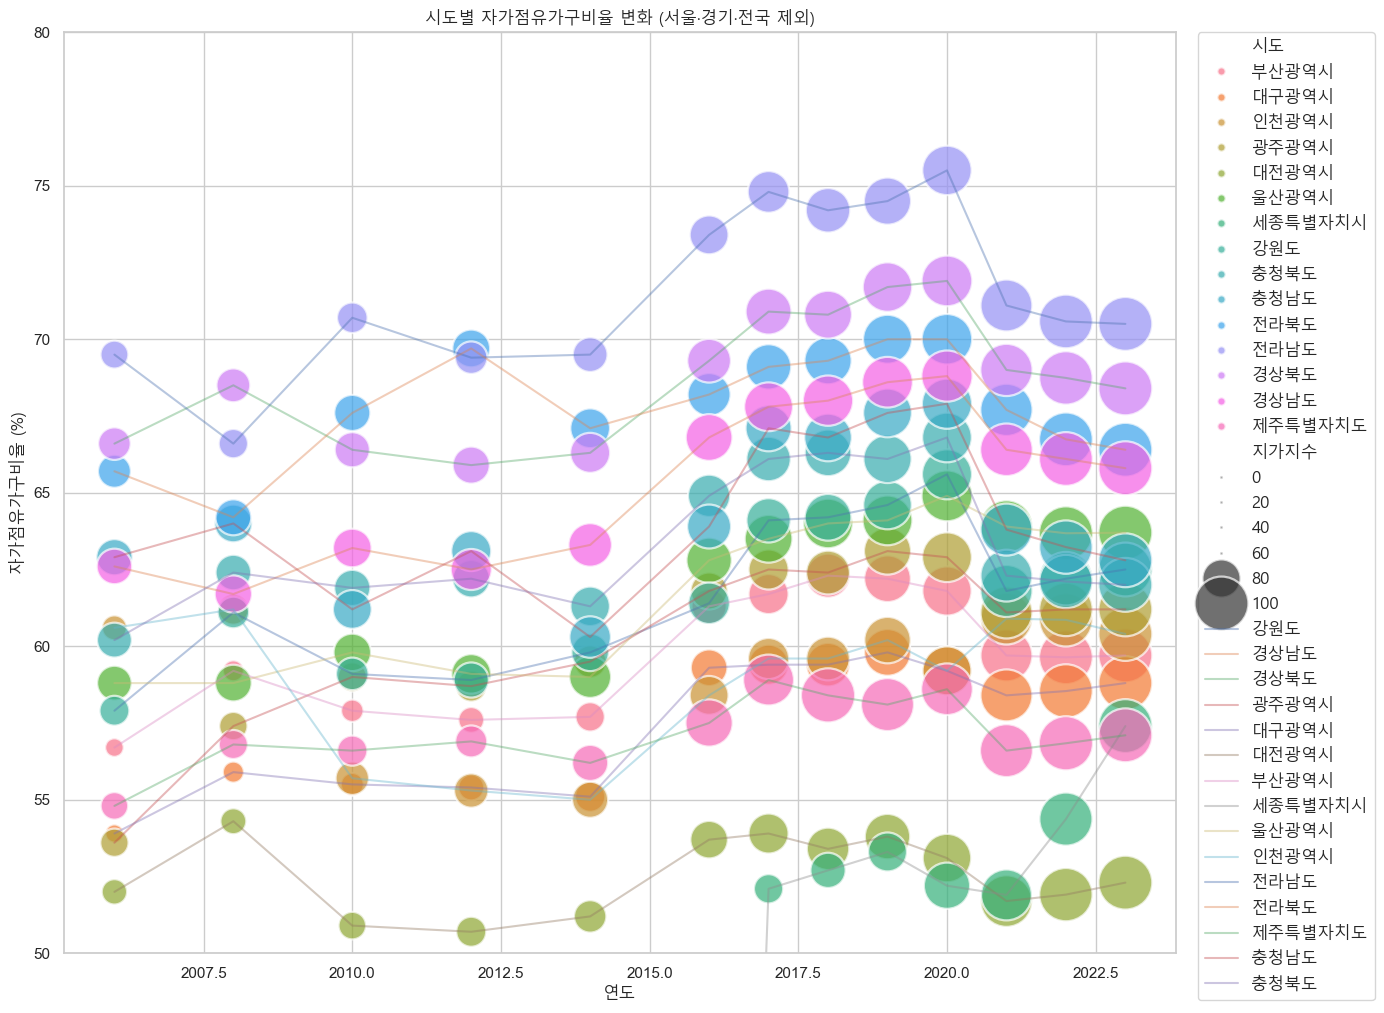

In [32]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(14, 11))
sns.set(style="whitegrid")

# 그래프
sns.scatterplot(
    data=df_plot,
    x='연도',
    y='자가점유가구비율',
    hue='시도',
    size='지가지수',
    sizes=(5, 3000),   # 최소~최대 점 크기 범위 지정
    alpha=0.7,
    size_norm=Normalize(vmin = 60, vmax = 140)
)

# 시도별 선 연결
for 시도, group in df_plot.groupby('시도'):
    plt.plot(group['연도'], group['자가점유가구비율'], alpha=0.4, label=시도)

# 제목과 축 라벨
plt.title("시도별 자가점유가구비율 변화 (서울·경기·전국 제외)", fontproperties=font_prop)
plt.xlabel("연도", fontproperties=font_prop)
plt.ylabel("자가점유가구비율 (%)", fontproperties=font_prop)
plt.ylim([50, 80])

# 범례는 시도만
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop=font_prop)

plt.tight_layout()
plt.show()

In [35]:
# 1. 서울, 경기도, 전국만 확인
include = ['서울특별시', '경기도']
df_plot2 = df_m[df_m['시도'].isin(include)].copy()

# 2. 연도 정렬을 위해 int 변환 (혹시라도 object형일 경우)
df_plot2['연도'] = df_plot2['연도'].astype(int)

NameError: name 'df_m' is not defined

In [34]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# 그래프
sns.scatterplot(
    data=df_plot2,
    x='연도',
    y='자가점유가구비율',
    hue='시도',
    size='지가지수',
    sizes=(10, 300),   # 최소~최대 점 크기 범위 지정
    alpha=0.7,
)

# 시도별 선 연결
for 시도, group in df_plot2.groupby('시도'):
    plt.plot(group['연도'], group['자가점유가구비율'], alpha=0.4, label=시도)

# 제목과 축 라벨
plt.title("시도별 자가점유가구비율 변화 (서울·경기·전국)", fontproperties=font_prop)
plt.xlabel("연도", fontproperties=font_prop)
plt.ylabel("자가점유가구비율 (%)", fontproperties=font_prop)

# 범례는 시도만
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop=font_prop)

plt.tight_layout()
plt.show()

NameError: name 'df_plot2' is not defined

<Figure size 800x600 with 0 Axes>

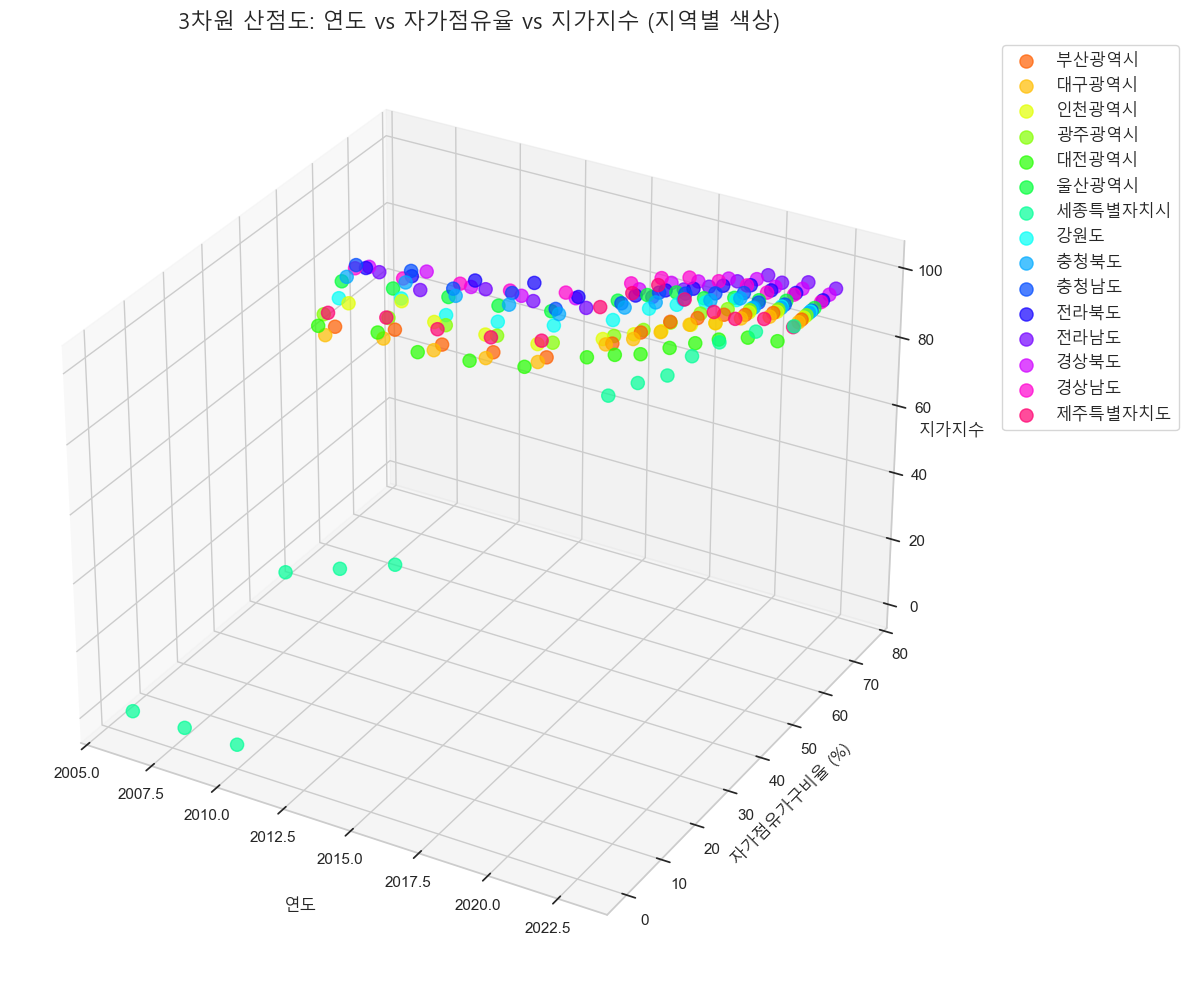

In [33]:
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시도 목록 및 색상 설정
시도_list = df_plot['시도'].unique()
palette = sns.color_palette("hsv", len(시도_list))  # 시도 수만큼 색상 생성
color_map = dict(zip(시도_list, palette))  # 시도 → 색상 매핑

# 3D figure 생성
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# 시도별로 점 그리기
for 시도 in 시도_list:
    subset = df_plot[df_plot['시도'] == 시도]
    ax.scatter(
        subset['연도'],
        subset['자가점유가구비율'],
        subset['지가지수'],
        color=color_map[시도],
        label=시도,
        s=90,
        alpha=0.7
    )

# 축 라벨 및 제목
ax.set_xlabel('연도', fontproperties=font_prop, labelpad = 20)
ax.set_ylabel('자가점유가구비율 (%)', fontproperties=font_prop)
ax.set_zlabel('지가지수', fontproperties=font_prop)
ax.set_title('3차원 산점도: 연도 vs 자가점유율 vs 지가지수 (지역별 색상)', fontproperties=font_prop, fontsize=16)

# 범례 추가
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop=font_prop)

plt.tight_layout()
plt.show()


In [ ]:
df2_r.to_csv('전처리/지가지수_전처리_병합용.csv')

In [ ]:
merged_df.to_csv('자가점유_고용_GRDP_지가_tableau용.csv', index = False)

In [ ]:
merged_df

In [ ]:
# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)


# 점 크기 정규화 (지가지수 → 상대적 크기)
min_size = 30
max_size = 1000

norm = (merged_df['지가지수'] - merged_df['지가지수'].min()) / (merged_df['지가지수'].max() - merged_df['지가지수'].min())
merged_df['size_scaled'] = norm * (max_size - min_size) + min_size

# 시각화
plt.figure(figsize=(14, 11))
sns.set(style="whitegrid")

sns.scatterplot(
    data=merged_df,
    x='연도',
    y='자가점유가구비율',
    hue='시도',
    size='size_scaled',         # 정규화된 크기
    sizes=(min_size, max_size),
    alpha=0.7
)

# 시도별 선 연결
for 시도, group in merged_df.groupby('시도'):
    plt.plot(group['연도'], group['자가점유가구비율'], alpha=0.4, label=시도)

# 제목과 축 라벨
plt.title("시도별 자가점유가구비율 변화 (서울·경기·전국 제외)", fontproperties=font_prop)
plt.xlabel("연도", fontproperties=font_prop)
plt.ylabel("자가점유가구비율 (%)", fontproperties=font_prop)

# 범례 (시도만)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, prop=font_prop)

plt.tight_layout()
plt.show()